# City of Boston Budget Analysis

https://github.com/Ryan-J-Gilbert/CS506-final-proj-budget

## Data Collection

### Operating Budget
 We will start with the FY25 Adopted Operating Budget found at the following link: https://data.boston.gov/dataset/operating-budget/resource/8f2971f0-7a0d-401d-8376-0289e3b810ba

| Data Field           | Description                                                                                             |
|----------------------|---------------------------------------------------------------------------------------------------------|
| **Cabinet**          | Cabinet associated with department                                                                      |
| **Dept**             | City department or agency                                                                               |
| **Program**          | Subordinate unit in City Dept or Agency                                                                 |
| **Expense Category** | Category of expenses such as personnel, contracted services, supplies, current charges, equipment, other. |
| **FY22 Actual Expense** | Actual expenses three years prior to most current budget                                                |
| **FY23 Actual Expense** | Actual expenses two years prior to most current budget                                                  |
| **FY24 Appropriation**  | Budget for year prior to current budget                                                                 |
| **FY25 Budget**         | Current budget either recommended or adopted                                                           |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

budget_df = pd.read_csv('data/fy25-adopted-operating-budget.csv')
budget_df.head()

,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.9,383743.11,219633.42,234628
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.3,25350.83,16734.29,20000
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115,53000


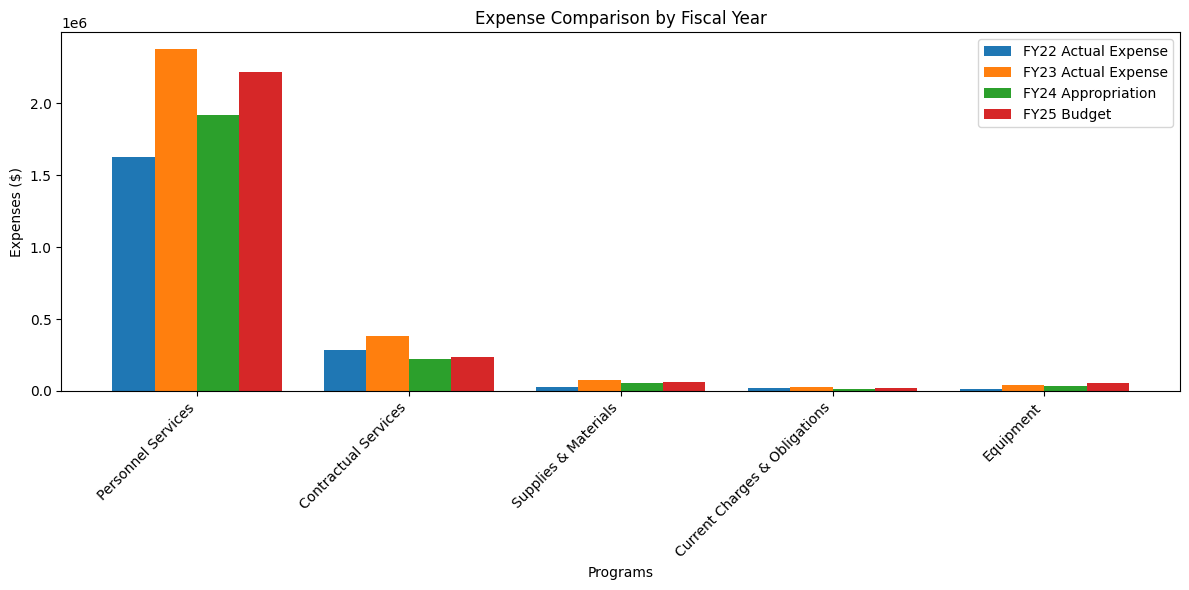

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
# budget_df = pd.read_csv('path_to_your_file.csv')

# Sample data from your screenshot for demonstration
programs = ['Personnel Services', 'Contractual Services', 'Supplies & Materials',
            'Current Charges & Obligations', 'Equipment']

# Expense data
expenses = {
    'FY22 Actual Expense': [1624903.69, 284597.9, 28541.55, 19410.3, 16164.36],
    'FY23 Actual Expense': [2374448.36, 383743.11, 74491.63, 25350.83, 44132.61],
    'FY24 Appropriation': [1921403.81, 219633.42, 55573.65, 16734.29, 36115],
    'FY25 Budget': [2217748.39, 234628, 60000, 20000, 53000]
}

# Create a DataFrame from the expense data
budget_df = pd.DataFrame(expenses, index=programs)

# Plotting
x = np.arange(len(programs))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each fiscal year's data
rects1 = ax.bar(x - 1.5 * width, budget_df['FY22 Actual Expense'], width, label='FY22 Actual Expense')
rects2 = ax.bar(x - 0.5 * width, budget_df['FY23 Actual Expense'], width, label='FY23 Actual Expense')
rects3 = ax.bar(x + 0.5 * width, budget_df['FY24 Appropriation'], width, label='FY24 Appropriation')
rects4 = ax.bar(x + 1.5 * width, budget_df['FY25 Budget'], width, label='FY25 Budget')

# Add labels and title
ax.set_xlabel('Programs')
ax.set_ylabel('Expenses ($)')
ax.set_title('Expense Comparison by Fiscal Year')
ax.set_xticks(x)
ax.set_xticklabels(programs, rotation=45, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [372]:
print(budget_df.isna().sum())
budget_df.info()

Cabinet                0
Dept                   0
Program                0
Expense Category       0
FY22 Actual Expense    0
FY23 Actual Expense    0
FY24 Appropriation     0
FY25 Budget            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cabinet              943 non-null    object
 1   Dept                 943 non-null    object
 2   Program              943 non-null    object
 3   Expense Category     943 non-null    object
 4   FY22 Actual Expense  943 non-null    object
 5   FY23 Actual Expense  943 non-null    object
 6   FY24 Appropriation   943 non-null    object
 7   FY25 Budget          943 non-null    object
dtypes: object(8)
memory usage: 59.1+ KB


In [6]:
# replace #Missing with NaN
budget_df = budget_df.replace('#Missing', np.nan)

In [7]:
# convert expense columns to floats
budget_df['FY22 Actual Expense'] = budget_df['FY22 Actual Expense'].astype(float)
budget_df['FY23 Actual Expense'] = budget_df['FY23 Actual Expense'].astype(float)
budget_df['FY24 Appropriation'] = budget_df['FY24 Appropriation'].astype(float)
budget_df['FY25 Budget'] = budget_df['FY25 Budget'].astype(float)

In [8]:
# unique values for Cabinet, Dept, Program, Expense Category
print('Cabinet unique values:')
print(budget_df['Cabinet'].unique())
print('\nDept unique values:')
print(budget_df['Dept'].unique())
print('\nProgram unique values:')
print(budget_df['Program'].unique())
print('\nExpense Category unique values:')
print(budget_df['Expense Category'].unique())


Cabinet unique values:


KeyError: 'Cabinet'

In [376]:
# Summing expenses by department for each fiscal year
dept_spending = budget_df.groupby('Dept')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
dept_spending = dept_spending.sort_values('FY25 Budget', ascending=False)
print(dept_spending)

                                      FY22 Actual Expense  \
Dept                                                        
Boston Public Schools                        1.294706e+09   
Police Department                            4.204116e+08   
Pensions                                     3.236842e+08   
Fire Department                              2.895138e+08   
Charter School Tuition                       2.298422e+08   
...                                                   ...   
Human Right Commission                       3.702503e+05   
Unemployment Compensation                    1.901616e+05   
Reserve                                      2.250274e+06   
Office of Diversity                          2.542203e+05   
Office of Resiliency & Racial Equity         1.740456e+06   

                                      FY23 Actual Expense  FY24 Appropriation  \
Dept                                                                            
Boston Public Schools                       

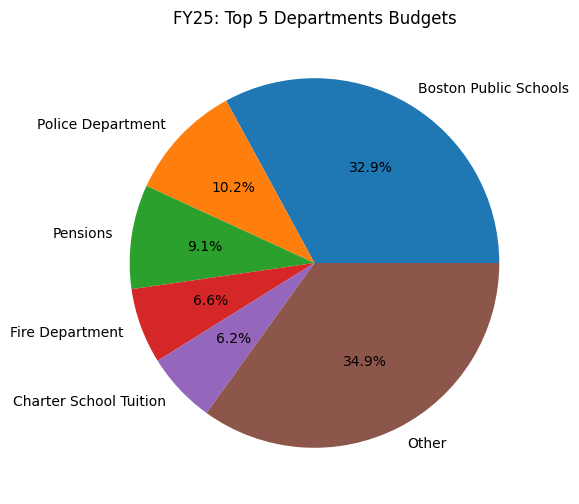

In [377]:
# pie chart of top n departments by budget, other for rest
n = 5
top_n = dept_spending.head(n)
other = dept_spending.iloc[n:].sum()
top_n.loc['Other'] = other
plt.figure(figsize=(6, 6))
top_n['FY25 Budget'].plot.pie(y='FY25 Budget', autopct='%1.1f%%', legend=False)
plt.axis('off')
plt.title(f'FY25: Top {n} Departments Budgets')
plt.show()

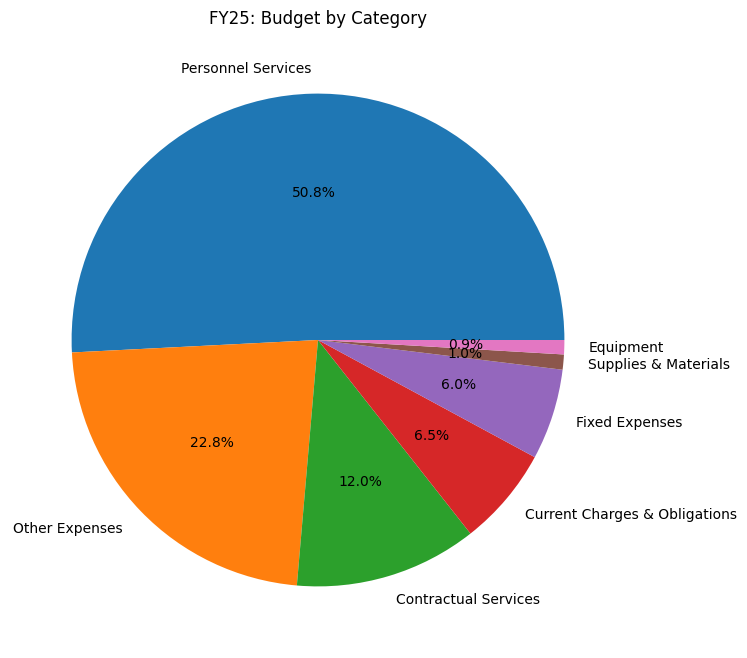

In [378]:
# pie chart for budget categories
category_spending = budget_df.groupby('Expense Category')['FY25 Budget'].sum()
category_spending = category_spending.sort_values(ascending=False)
plt.figure(figsize=(8, 8))
category_spending.plot.pie(y='FY25 Budget', autopct='%1.1f%%', legend=False)
plt.axis('off')
plt.title('FY25: Budget by Category')
plt.show()

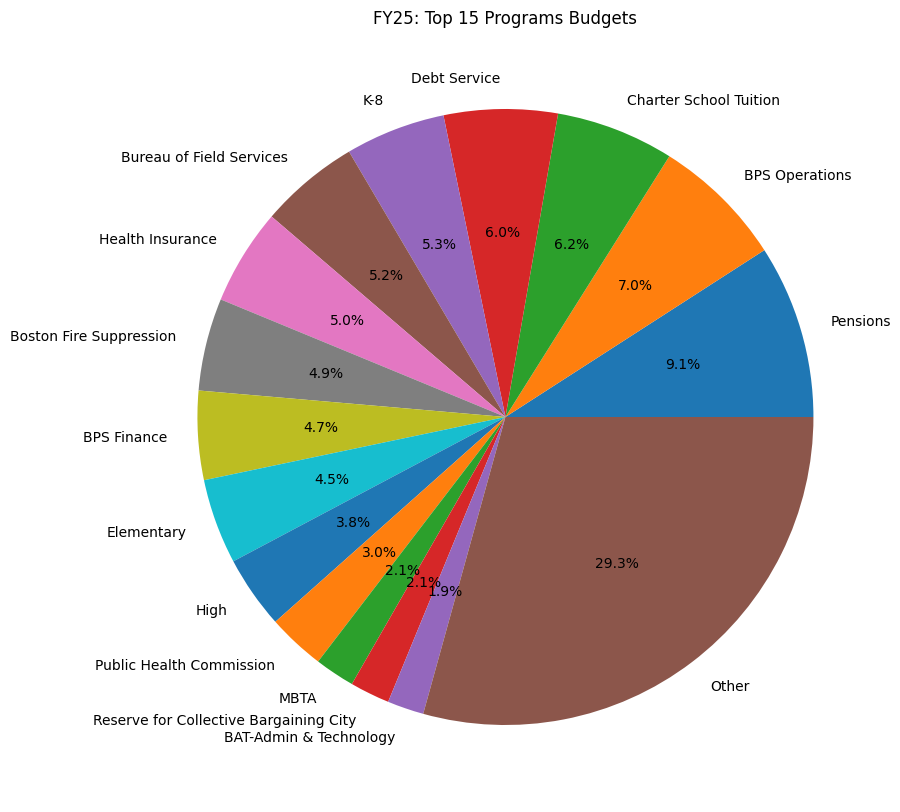

In [379]:
# pie chart for budget by program for top n programs
n2 = 15
program_spending = budget_df.groupby('Program')['FY25 Budget'].sum()
program_spending = program_spending.sort_values(ascending=False)
top_n_program = program_spending.head(n2)
other = program_spending.iloc[n2:].sum()
top_n_program.loc['Other'] = other
plt.figure(figsize=(10, 10))
top_n_program.plot.pie(autopct='%1.1f%%', legend=False)
plt.axis('off')
plt.title(f'FY25: Top {n2} Programs Budgets')
plt.show()

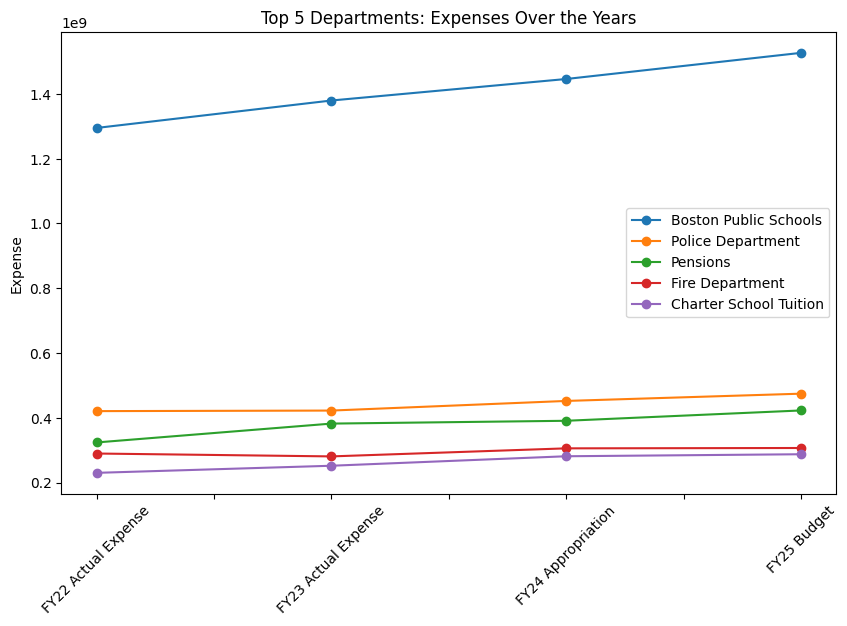

In [380]:
# plot expenses over the years for top n departments
# as a line plot
plt.figure(figsize=(10, 6))
for dept in dept_spending.head(n).index:
    dept_data = budget_df[budget_df['Dept'] == dept]
    dept_data = dept_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    dept_data.plot(marker='o', label=dept)
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title(f'Top {n} Departments: Expenses Over the Years')

plt.legend()
plt.show()

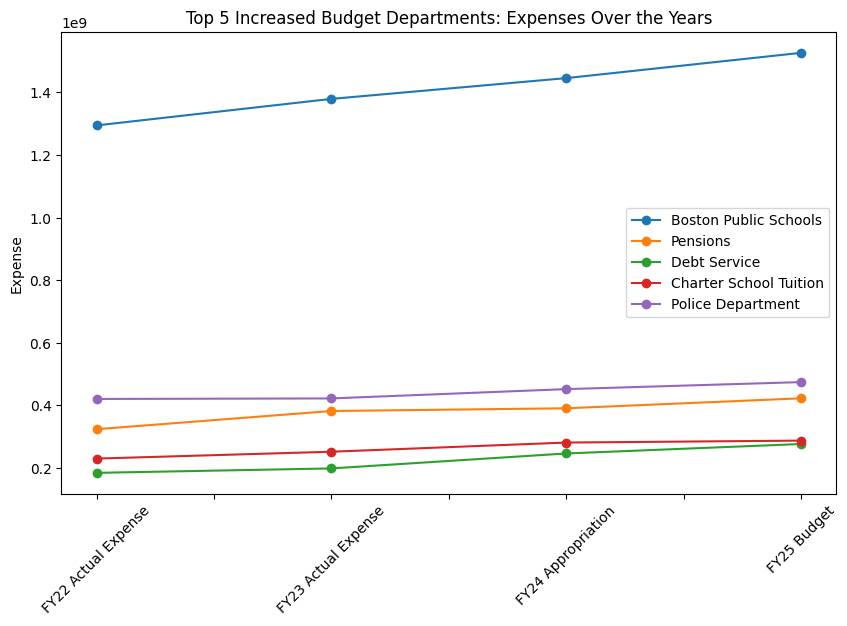

In [381]:
# plot department expenses over the years as a line chart
# for departments with the highest increase in budget
dept_spending['Increase'] = dept_spending['FY25 Budget'] - dept_spending['FY22 Actual Expense']
dept_spending = dept_spending.sort_values('Increase', ascending=False)
plt.figure(figsize=(10, 6))
for dept in dept_spending.head(n).index:
    dept_data = budget_df[budget_df['Dept'] == dept]
    dept_data = dept_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    dept_data.plot(marker='o', label=dept)
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title(f'Top {n} Increased Budget Departments: Expenses Over the Years')

plt.legend()
plt.show()

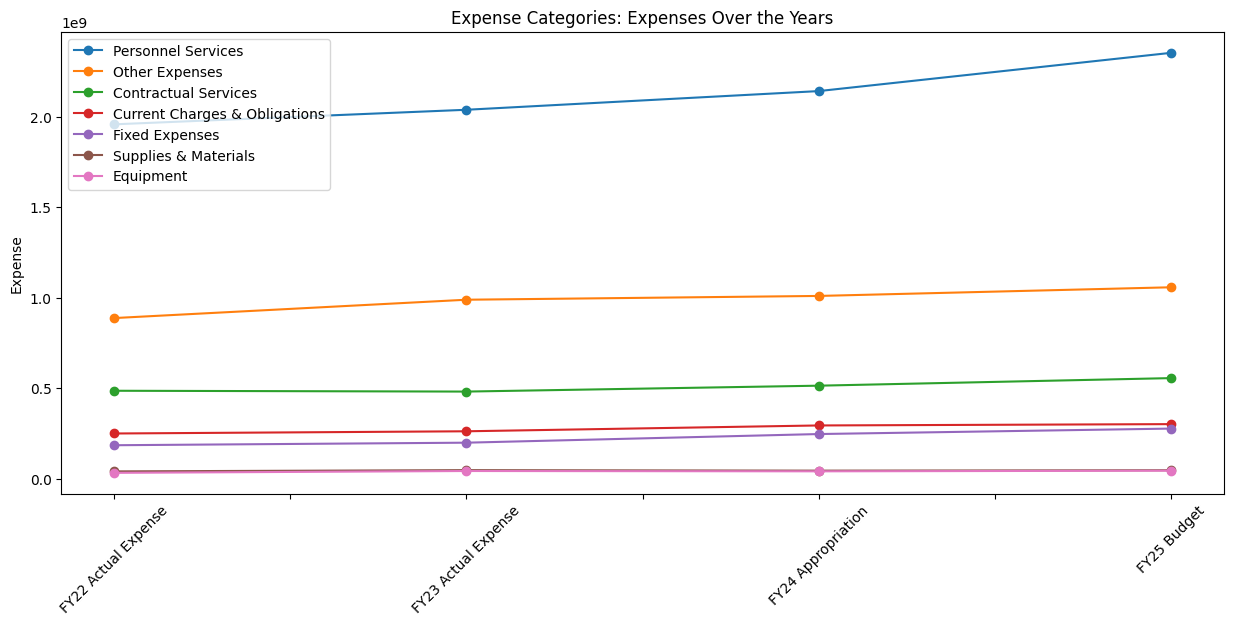

In [382]:
# plot expenses over the years for categories
# as a line plot
plt.figure(figsize=(15, 6))
for category in category_spending.index:
    category_data = budget_df[budget_df['Expense Category'] == category]
    category_data = category_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    category_data.plot(marker='o', label=category)
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title('Expense Categories: Expenses Over the Years')

plt.legend(loc='upper left')
plt.show()

### Expense

 We will start with the FY25 Adopted Capital Budget found at the following link: https://data.boston.gov/dataset/capital-budget/resource/c62d666e-27ea-4c03-9cb1-d3a81a1fb641

| Data Field               | Description                                                                                           |
|--------------------------|-------------------------------------------------------------------------------------------------------|
| **Department**           | City department or agency responsible for the project                                                 |
| **Project Name**         | Name of the capital project                                                                           |
| **Scope Of Work**        | Description of the work involved in the project                                                       |
| **Project Status**       | Current status of the project (e.g., in design, to be scheduled)                                      |
| **Neighborhood**         | Specific neighborhood(s) impacted by the project                                                     |
| **Authorization Existing** | Authorized budget from prior years                                                                  |
| **Authorization FY**     | Authorized budget for the current fiscal year                                                        |
| **Authorization Future** | Budget authorization planned for future fiscal years                                                 |
| **Grant Existing**       | Grant funding allocated in prior years                                                               |
| **Grant FY**             | Grant funding allocated for the current fiscal year                                                  |
| **Grant Future**         | Planned future grant funding allocations                                                             |
| **Total Project Budget** | Total budget allocated for the project                                                               |


In [4]:
capital_budget_df = pd.read_csv('data/fy25-adopted-capital-budget.csv')
capital_budget_df.head()

,_id,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,1,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,Improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,2000000,0,0,...,0.0,0,0,2000000.0,0.0,0,0,0.0,0,2000000
1,2,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,Repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,...,84629.0,139188,400000,1176183.0,0.0,0,0,0.0,0,1800000
2,3,Boston Centers for Youth and Families,BCYF North End Community Center,Design and construct a new North End Community...,Public Facilities Department,In Design,North End,68000000,0,0,...,9500.0,1000000,2000000,64990500.0,0.0,0,0,0.0,20000000,88000000
3,4,Boston Centers for Youth and Families,Pool Repairs,Renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,2300000,2700000,0,...,886590.0,500000,1000000,2613410.0,0.0,0,0,0.0,0,5000000
4,5,Boston Centers for Youth and Families,Youth Budget Round 4,Engage youth across the City using participato...,Youth Engagement and Advancement,Implementation Underway,Citywide,1000000,0,0,...,28500.0,13815,0,957685.0,0.0,0,0,0.0,0,1000000


In [3]:
print(capital_budget_df.isna().sum())
capital_budget_df.info()

capital_budget_df = capital_budget_df.replace('#Missing', np.nan)

float_columns = [
	'Authorization_Existing', 'Authorization_FY', 'Authorization_Future', 
	'Grant_Existing', 'Grant_FY', 'Grant_Future', 'GO_Expended', 'Capital_Year_0', 
	'CapitalYear_1', 'Capital_Year_25', 'Grant_Expended', 'Grant_Year_0', 
	'Grant_Year_1', 'GrantYear_25', 'External_Funds', 'Total_Project_Budget'
]
capital_budget_df[float_columns] = capital_budget_df[float_columns].astype(float)


NameError: name 'capital_budget_df' is not defined

Department
Boston Public Schools                      1.279894e+09
Public Works Department                    1.146100e+09
Property Management Department             3.544800e+08
Parks and Recreation Department            3.390142e+08
Transportation Department                  3.248421e+08
Boston Public Library                      2.138100e+08
Boston Centers for Youth and Families      2.116750e+08
Mayor's Office of Housing                  1.930000e+08
Environment Department                     1.708701e+08
Fire Department                            1.533521e+08
Public Health Commission                   8.528000e+07
Department of Innovation and Technology    8.268689e+07
Police Department                          7.461700e+07
Boston Planning and Development Agency     3.747500e+07
Office of Arts & Culture                   2.532500e+07
Emergency Management                       1.500000e+06
Name: Total_Project_Budget, dtype: float64


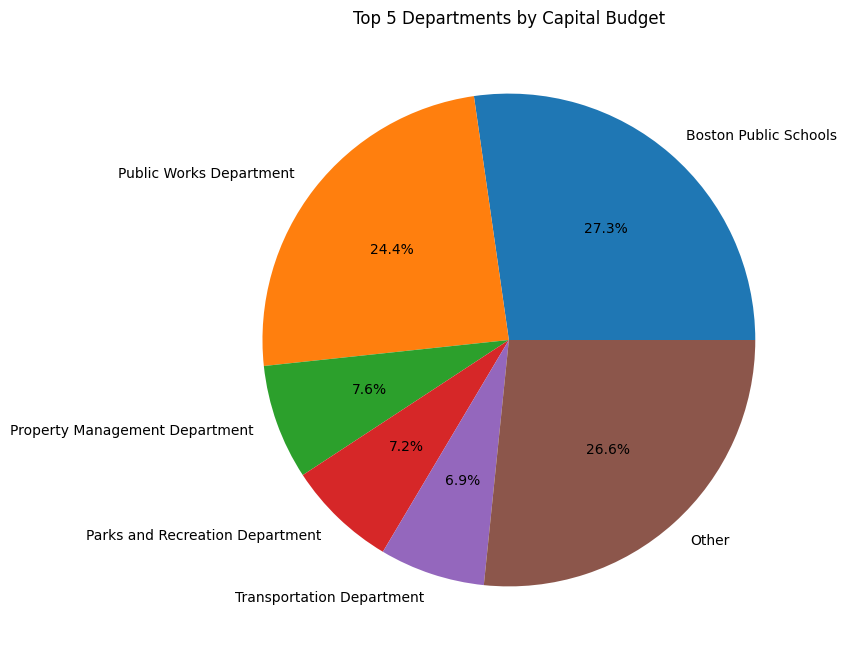

In [385]:
# Summing Project  by Department
department_spending = capital_budget_df.groupby('Department')['Total_Project_Budget'].sum().sort_values(ascending=False)
print(department_spending)

# Pie chart for top departments by total budget
top_n_departments = 5
top_departments = department_spending.head(top_n_departments)
other_departments = department_spending.iloc[top_n_departments:].sum()
top_departments['Other'] = other_departments

plt.figure(figsize=(8, 8))
top_departments.plot.pie(autopct='%1.1f%%', legend=False)
plt.axis('off')
plt.title(f'Top {top_n_departments} Departments by Capital Budget')
plt.show()


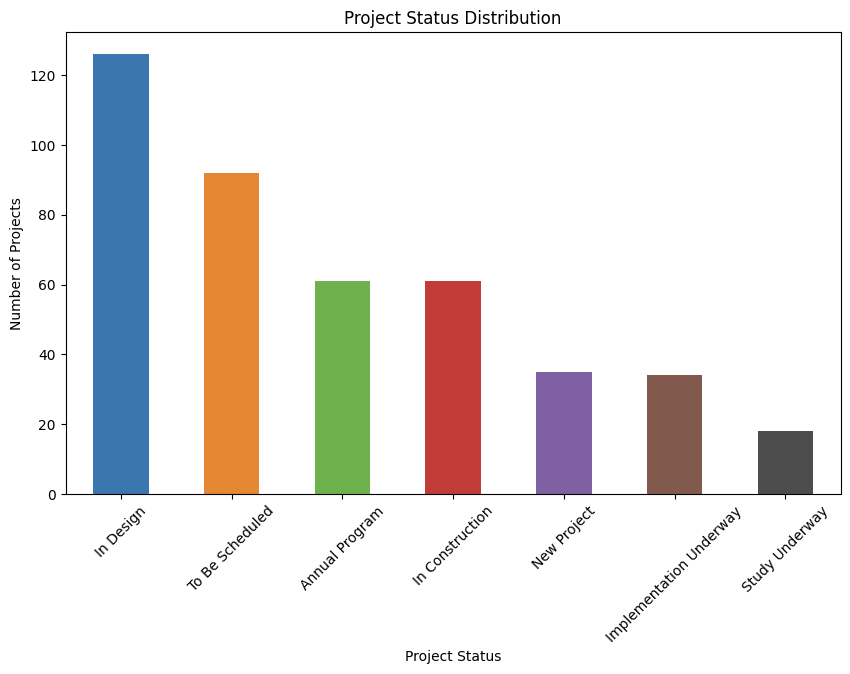

In [14]:
# Project Status Distribution as a bar chart with an extended custom color palette
project_status_counts = capital_budget_df['Project_Status'].value_counts()

# Custom color palette based on the colors in your image, with one extra color added
color_palette = ['#3C76AF', '#E68733', '#6EB14D', '#C13B37', '#7F60A3', '#825A4D', '#4D4D4D']  # Added a neutral gray

# Plotting
plt.figure(figsize=(10, 6))
project_status_counts.plot(kind='bar', color=color_palette)
plt.title('Project Status Distribution')
plt.xlabel('Project Status')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()


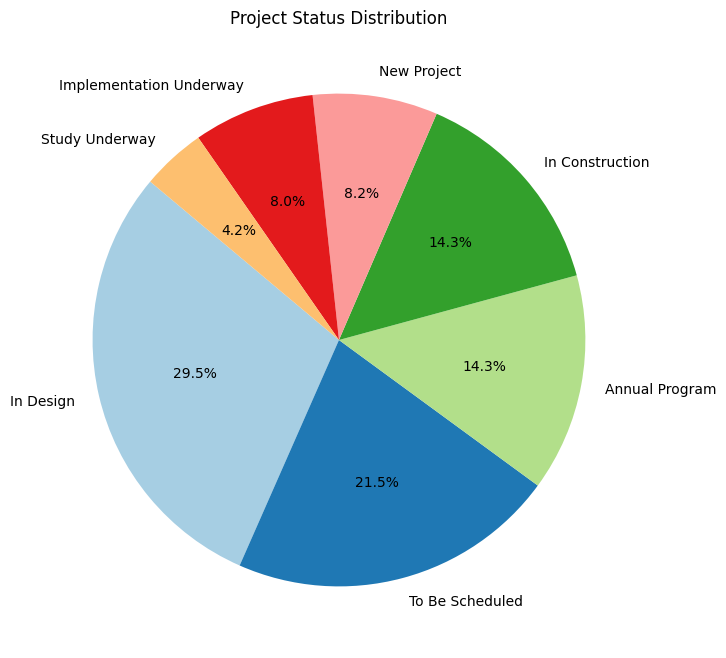

In [10]:
# Project Status Distribution as a pie chart
project_status_counts = capital_budget_df['Project_Status'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
project_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Project Status Distribution')
plt.ylabel('')  # Hide the y-label for better appearance
plt.show()


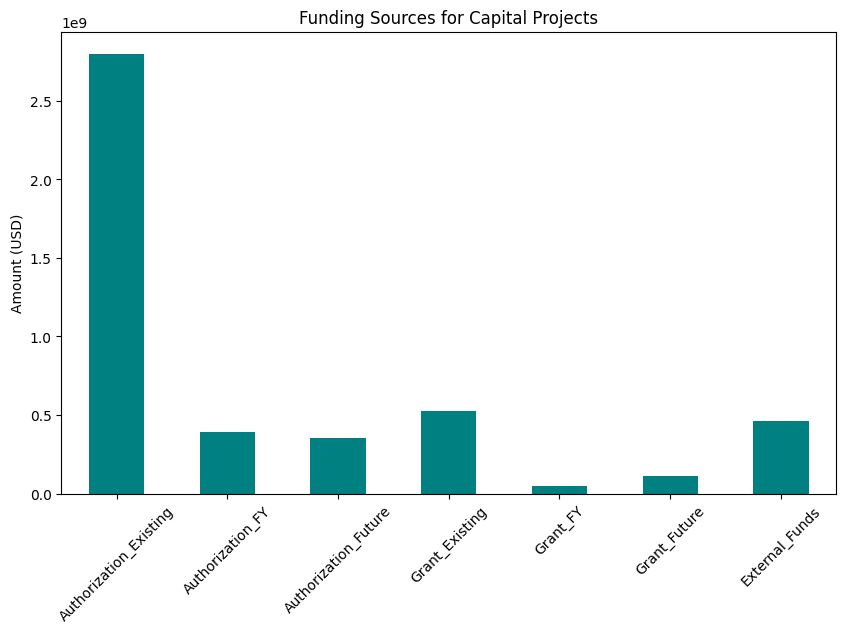

In [387]:
# Funding Sources
funding_sources = ['Authorization_Existing', 'Authorization_FY', 'Authorization_Future', 
                   'Grant_Existing', 'Grant_FY', 'Grant_Future', 'External_Funds']
funding_totals = capital_budget_df[funding_sources].sum()

plt.figure(figsize=(10, 6))
funding_totals.plot(kind='bar', color='teal')
plt.title('Funding Sources for Capital Projects')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()


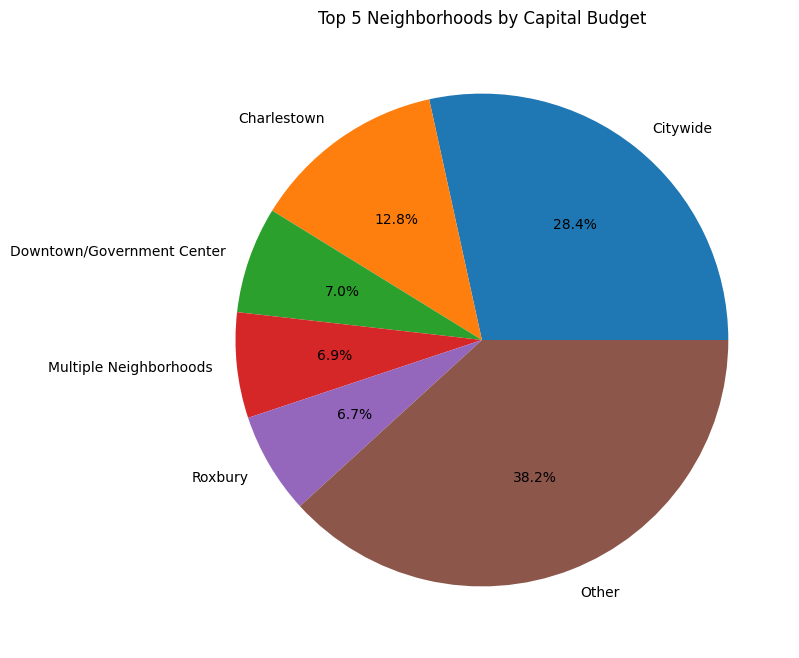

In [388]:
# Neighborhood Budget Distribution
neighborhood_budget = capital_budget_df.groupby('Neighborhood')['Total_Project_Budget'].sum().sort_values(ascending=False)

# Pie chart for top neighborhoods by budget
top_n_neighborhoods = 5
top_neighborhoods = neighborhood_budget.head(top_n_neighborhoods)
other_neighborhoods = neighborhood_budget.iloc[top_n_neighborhoods:].sum()
top_neighborhoods['Other'] = other_neighborhoods

plt.figure(figsize=(8, 8))
top_neighborhoods.plot.pie(autopct='%1.1f%%', legend=False)
plt.axis('off')
plt.title(f'Top {top_n_neighborhoods} Neighborhoods by Capital Budget')
plt.show()


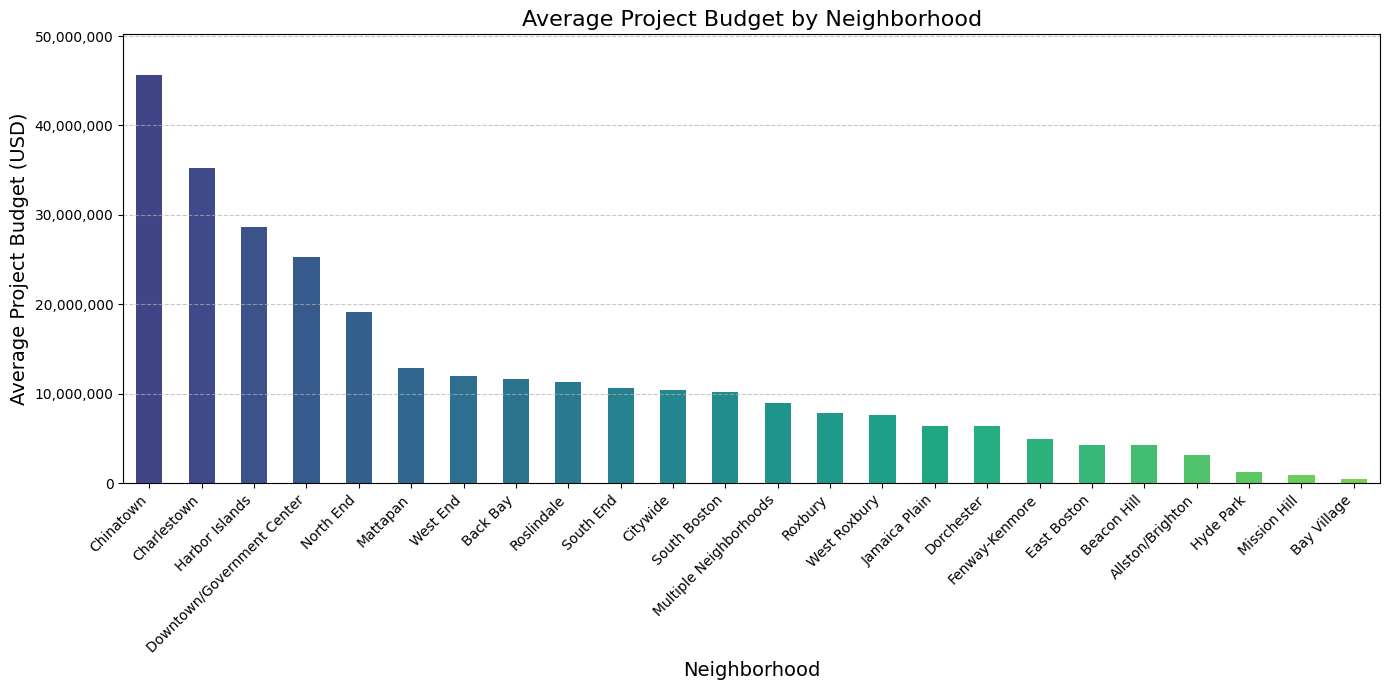

In [7]:
# Average Project Budget by Neighborhood with unique colors
average_neighborhood_budget = capital_budget_df.groupby('Neighborhood')['Total_Project_Budget'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

# Generate unique colors using a valid colormap, such as 'viridis'
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(average_neighborhood_budget)))

average_neighborhood_budget.plot(kind='bar', color=colors)

# Add title and labels
plt.title('Average Project Budget by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Project Budget (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right') 

# Set y-limit slightly above the maximum budget value
plt.ylim(0, average_neighborhood_budget.max() * 1.1)  

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis as thousands separator
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


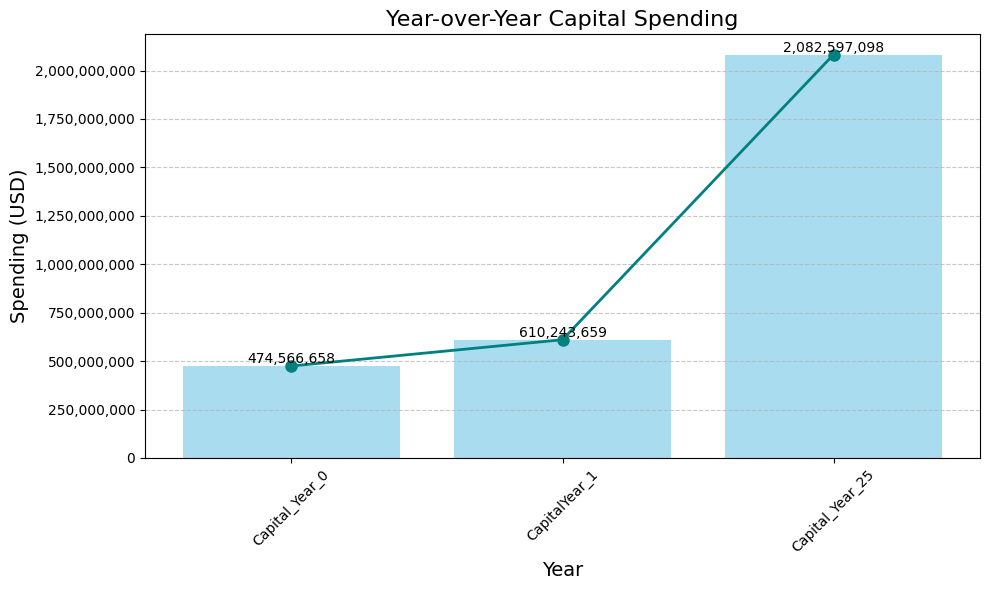

In [390]:
# Year-over-Year Capital Spending
years = ['Capital_Year_0', 'CapitalYear_1', 'Capital_Year_25']
capital_yearly_spending = capital_budget_df[years].sum()

plt.figure(figsize=(10, 6))

# Create a bar plot
bars = plt.bar(capital_yearly_spending.index, capital_yearly_spending, color='skyblue', alpha=0.7)

# Overlay a line plot
plt.plot(capital_yearly_spending.index, capital_yearly_spending, marker='o', color='teal', linestyle='-', linewidth=2, markersize=8)

# Adding data labels on top of the bars
for bar in bars:
	yval = bar.get_height()
	plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Year-over-Year Capital Spending', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Spending (USD)', fontsize=14)
plt.xticks(rotation=45)

# Format y-axis labels for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


<Figure size 1400x1000 with 0 Axes>

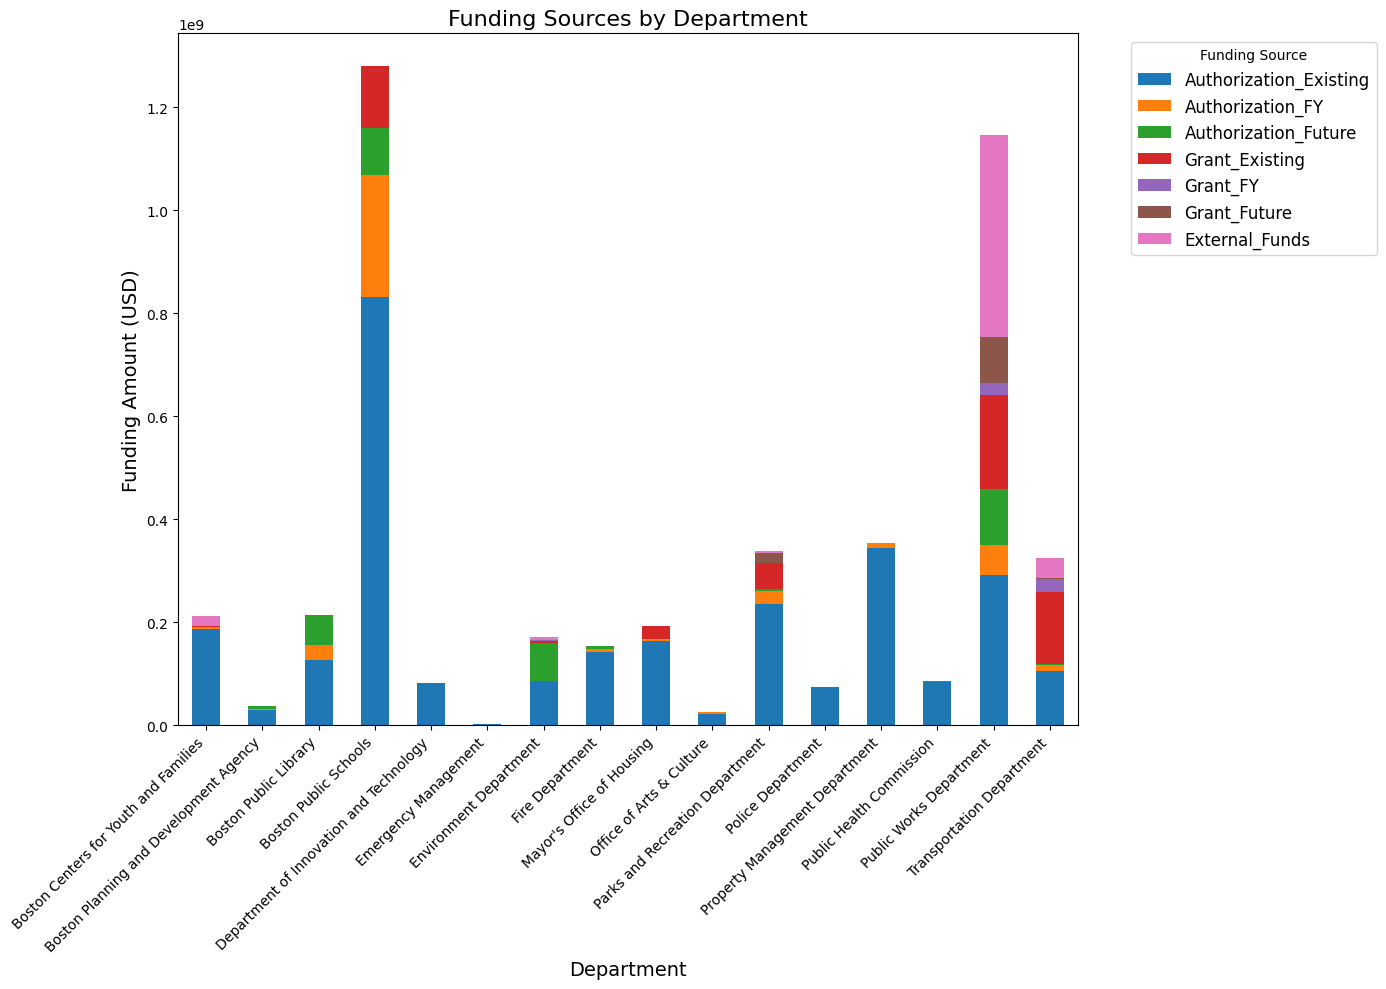

In [391]:
funding_sources = [
    'Authorization_Existing', 'Authorization_FY', 'Authorization_Future',
    'Grant_Existing', 'Grant_FY', 'Grant_Future', 'External_Funds'
]

# Sum funding sources by department
funding_by_department = capital_budget_df.groupby('Department')[funding_sources].sum()

# Plotting
plt.figure(figsize=(14, 10))  # Increased figure size for better visibility
colors = plt.cm.tab10.colors  # Using a colormap for better color differentiation

# Create the stacked bar plot
funding_by_department.plot(kind='bar', stacked=True, figsize=(14, 10), color=colors)

# Title and labels
plt.title('Funding Sources by Department', fontsize=16)
plt.ylabel('Funding Amount (USD)', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
plt.legend(title='Funding Source', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()


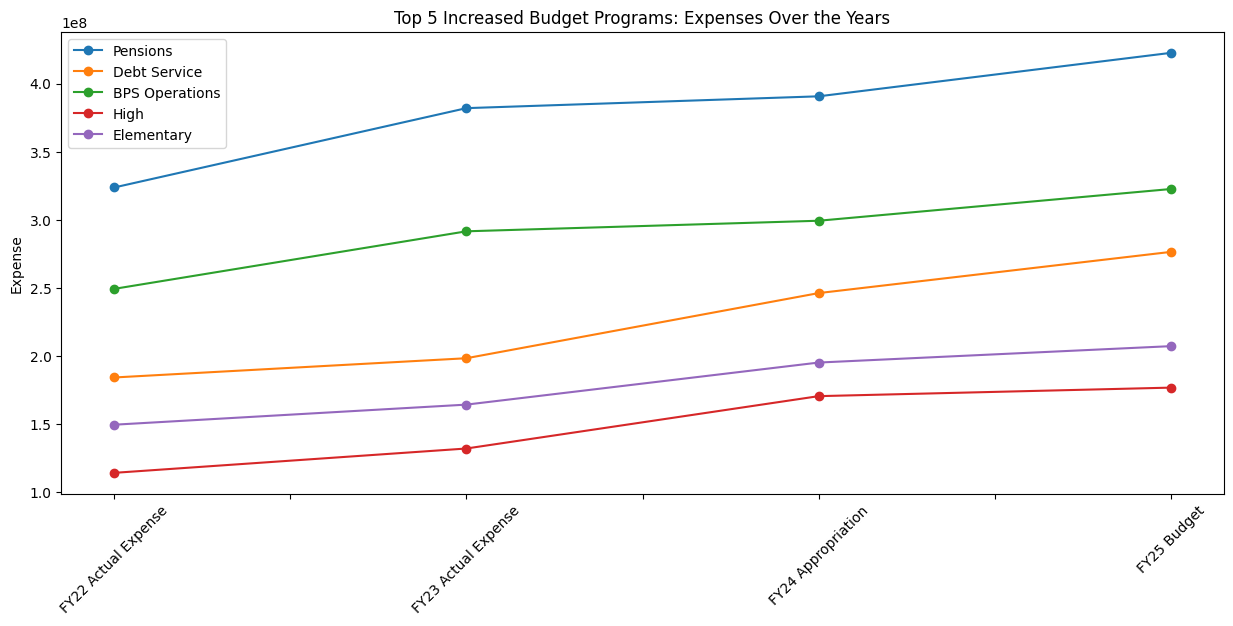

In [392]:
# plot program expenses over the years as a line chart
# for programs with the highest increase in budget
program_spending = budget_df.groupby('Program')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
program_spending['Increase'] = program_spending['FY25 Budget'] - program_spending['FY22 Actual Expense']
program_spending = program_spending.sort_values('Increase', ascending=False)
plt.figure(figsize=(15, 6))
for program in program_spending.head(n).index:
    program_data = budget_df[budget_df['Program'] == program]
    program_data = program_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    program_data.plot(marker='o', label=program)
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title(f'Top {n} Increased Budget Programs: Expenses Over the Years')

plt.legend(loc='upper left')
plt.show()

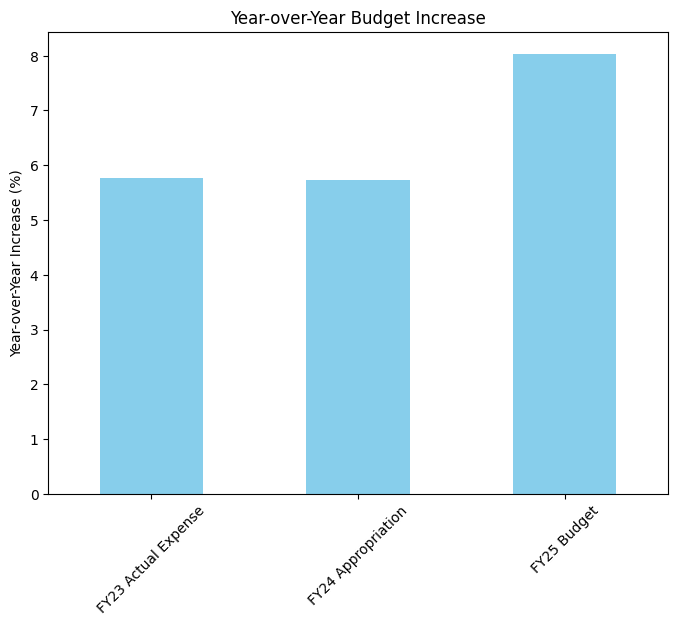

In [393]:
# overall budget change over the years
# Sum budget expenses for each year to get the total budget per year
budget_increase = budget_df[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()

# Calculate year-over-year percentage changes
budget_change_yoy = budget_increase.pct_change() * 100

# Remove the first entry as it will be NaN (no previous year for FY22)
budget_change_yoy = budget_change_yoy.dropna()

# Plotting the year-over-year changes
plt.figure(figsize=(8, 6))
budget_change_yoy.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Year-over-Year Increase (%)')
plt.title('Year-over-Year Budget Increase')
plt.show()

In [394]:
# see list of neighborhoods
print(capital_budget_df['Neighborhood'].unique())

['Citywide' 'Mission Hill' 'North End' 'Hyde Park' 'Roslindale'
 'Allston/Brighton' 'Dorchester' 'Charlestown' 'South Boston'
 'Downtown/Government Center' 'Harbor Islands' 'Roxbury' 'Mattapan'
 'Back Bay' 'Chinatown' 'South End' 'West End' 'Jamaica Plain'
 'Multiple Neighborhoods' 'Bay Village' 'Fenway-Kenmore' 'West Roxbury'
 'Beacon Hill' 'East Boston']


### Boston Neighborhoods Shapefile
Sourced from: https://data.boston.gov/dataset/census-2020-block-group-neighborhoods/resource/ed89fab7-aa21-42ce-874b-1b4971ab50fb

In [395]:
import geopandas as gpd
import folium

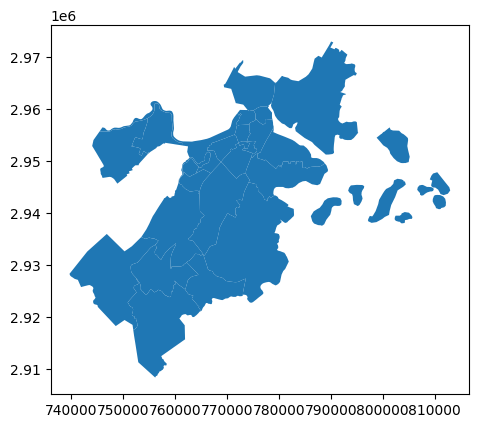

0                     Allston
1                    Back Bay
2                 Beacon Hill
3                    Brighton
4                 Charlestown
5                   Chinatown
6                  Dorchester
7                    Downtown
8                 East Boston
9                      Fenway
10             Harbor Islands
11                  Hyde Park
12              Jamaica Plain
13                   Longwood
14                   Mattapan
15               Mission Hill
16                  North End
17                 Roslindale
18                    Roxbury
19               South Boston
20    South Boston Waterfront
21                  South End
22                   West End
23               West Roxbury
Name: BlockGr202, dtype: object

In [396]:
neighborhoods = gpd.read_file('data/Census2020_BG_Neighborhoods/Census2020_BG_Neighborhoods.shp')
neighborhoods.plot()
plt.show()
neighborhoods['BlockGr202']

In [397]:
# find differences between the two sets
set(capital_budget_df['Neighborhood'].unique()) - set(neighborhoods['BlockGr202'])

{'Allston/Brighton',
 'Bay Village',
 'Citywide',
 'Downtown/Government Center',
 'Fenway-Kenmore',
 'Multiple Neighborhoods'}

In [398]:
# rename neighborhoods to match the budget set
# 'Allston':'Allston/Brighton'
# 'Downtown':'Downtown/Government Center'
# 'Fenway':'Fenway-Kenmore'

# NOTE these contain multiple neighborhoods:
# 'Citywide'
# 'Multiple Neighborhoods'

# NOTE we are missing 'Bay Village' from the shapefile, but the shapefile's South End includes it

# rename neighborhoods in the budget dataframe
capital_budget_df['Neighborhood'] = capital_budget_df['Neighborhood'].replace({
    'Allston/Brighton':'Allston',
    'Downtown/Government Center':'Downtown',
    'Fenway-Kenmore':'Fenway',
    'Bay Village':'South End'
})


In [399]:
# make a chrolopeth map of neighborhoods and total budget
# it should also be hoverable to show the neighborhood name and budget
# the map should be colored by budget

# Sum total project budget by neighborhood
neighborhood_budget = capital_budget_df.groupby('Neighborhood')['Total_Project_Budget'].sum()
# format the budget to be more readable
neighborhood_budget = neighborhood_budget.map('${:,.0f}'.format)

# Merge the neighborhood shapefile with the budget data
neighborhoods = neighborhoods.merge(neighborhood_budget, left_on='BlockGr202', right_index=True)

# Create a folium map
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12, tiles='cartodbpositron')

# Add the neighborhood boundaries to the map with hover popups
folium.GeoJson(
    neighborhoods,
    tooltip=folium.GeoJsonTooltip(fields=['BlockGr202', 'Total_Project_Budget'],aliases=['Neighborhood','Total Project Budget'], labels=True),
    popup=folium.GeoJsonPopup(fields=['BlockGr202', 'Total_Project_Budget'],aliases=['Neighborhood','Total Project Budget'], labels=True, sticky=False, localize=True, show=True, max_width=250),
).add_to(m)

m#.save('neighborhood_budget_map.html')


# Display the map

### Per Capita Income
Sourced from https://data.boston.gov/dataset/neighborhood-demographics/resource/d8c23c6a-b868-4ba4-8a3b-b9615a21be07?view_id=875bddaa-ffb9-4eaa-bdb5-1b77b414182b

In [412]:
income_df = pd.read_csv('data/2015-2019_neighborhood_tables_2021.12.21.csv')
income_df.columns = ['Location', 'Total population', 'Income', 'Per Capita Income','.','..']
income_df = income_df[['Location','Total population', 'Income', 'Per Capita Income']].dropna()
# drop first three rows US, MA, Boston
income_df = income_df.iloc[3:].reset_index(drop=True)
# convert to numbers
income_df['Total population'] = income_df['Total population'].str.replace(',','').astype(int)
income_df['Income'] = income_df['Income'].str.replace(',','').str.replace('$','').astype(int)
income_df['Per Capita Income'] = income_df['Per Capita Income'].str.replace(',','').str.replace('$','').astype(int)
income_df

,Location,Total population,Income,Per Capita Income
0,Allston,19261,657738300,34149
1,Back Bay,17783,1968165900,110677
2,Beacon Hill,9648,964851000,100005
3,Brighton,55297,2281630300,41261
4,Charlestown,19890,1498490600,75339
5,Dorchester,126909,3777726600,29767
6,Downtown,18306,1465529700,80057
7,East Boston,47263,1487486900,31473
8,Fenway,33489,938405800,28021
9,Hyde Park,38924,1274530600,32744


In [3]:
# add expenses to the income dataframe
neighborhood_expenses = capital_budget_df.groupby('Neighborhood')['Total_Project_Budget'].sum()
neighborhood_expenses = neighborhood_expenses.reset_index()
neighborhood_expenses.columns = ['Location', 'Total_Project_Budget']
income_df = income_df.merge(neighborhood_expenses, on='Location', how='left')
income_df['Total_Project_Budget'] = income_df['Total_Project_Budget'].fillna(0)
# income_df['Total_Project_Budget'] = income_df['Total_Project_Budget'].map('${:,.0f}'.format)
income_df['Per Capita Expenses'] = income_df['Total_Project_Budget'] / income_df['Total population']
# fill in 0s with nans
income_df = income_df.replace(0, np.nan)
income_df

NameError: name 'capital_budget_df' is not defined

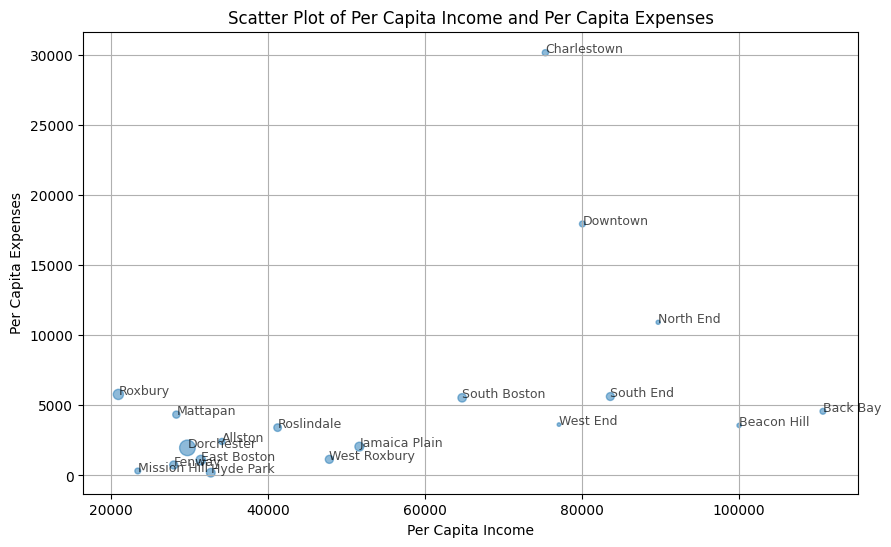

In [415]:
# scatter plot of per capita income and per capita expenses
plt.figure(figsize=(10, 6))
plt.scatter(income_df['Per Capita Income'], income_df['Per Capita Expenses'], s=income_df['Total population']/1000, alpha=0.5)

# label points
for i, row in income_df.iterrows():
    plt.annotate(row['Location'], (row['Per Capita Income'], row['Per Capita Expenses']), fontsize=9, alpha=0.7)

plt.xlabel('Per Capita Income')
plt.ylabel('Per Capita Expenses')
plt.title('Scatter Plot of Per Capita Income and Per Capita Expenses')
plt.grid(True)
plt.show()

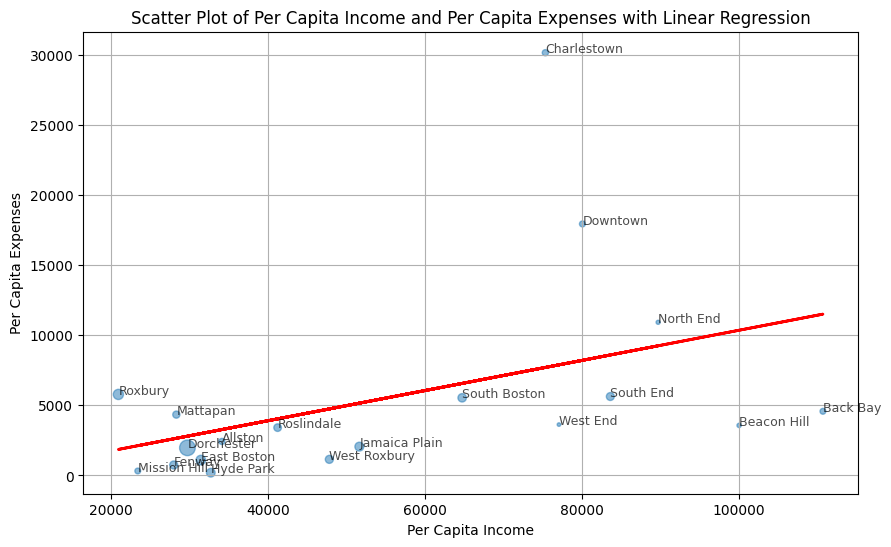

In [417]:
# fit linear model to Per capita income and per capita expenses
from sklearn.linear_model import LinearRegression
dropped = income_df.dropna()
X = dropped['Per Capita Income'].values.reshape(-1, 1)
y = dropped['Per Capita Expenses']

model = LinearRegression()
model.fit(X, y)

# plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(income_df['Per Capita Income'], income_df['Per Capita Expenses'], s=income_df['Total population']/1000, alpha=0.5)

# plot the linear regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# label points
for i, row in income_df.iterrows():
    plt.annotate(row['Location'], (row['Per Capita Income'], row['Per Capita Expenses']), fontsize=9, alpha=0.7)

plt.xlabel('Per Capita Income')
plt.ylabel('Per Capita Expenses')
plt.title('Scatter Plot of Per Capita Income and Per Capita Expenses with Linear Regression')
plt.grid(True)

In [419]:
# make hoverable and chrloropleth map of per capita income and per capital expenses
# the map should be colored by income and expenses
# the map should be hoverable to show the neighborhood name
# the map should have a legend

# Merge the neighborhood shapefile with the income data
neighborhoods_merged = neighborhoods.merge(income_df, left_on='BlockGr202', right_on='Location')

# Predict per capita expenses using the linear regression model
neighborhoods_merged['Predicted Per Capita Expenses'] = model.predict(neighborhoods_merged[['Per Capita Income']])

# Create a folium map
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12, tiles='cartodbpositron')

# Add the neighborhood boundaries to the map with hover popups
folium.GeoJson(
    neighborhoods_merged,
    tooltip=folium.GeoJsonTooltip(fields=['Location', 'Per Capita Income', 'Per Capita Expenses'], aliases=['Neighborhood', 'Per Capita Income', 'Per Capita Expenses'], labels=True),
    popup=folium.GeoJsonPopup(fields=['Location', 'Per Capita Income', 'Per Capita Expenses'], aliases=['Neighborhood', 'Per Capita Income', 'Per Capita Expenses'], labels=True, sticky=False, localize=True, show=True, max_width=250),
    style_function=lambda x: {
        'fillColor': 'green' if x['properties']['Per Capita Expenses'] > x['properties']['Predicted Per Capita Expenses'] else 'red',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)

m#.save('neighborhood_income_expenses_map.html')

# Display the map
